In [31]:
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from matplotlib import pyplot
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [32]:
def get_dataset():
    x_train, x_test, y_train, y_test = pd.read_pickle('./data/forest/forest.pkl')
    return x_train, x_test, y_train, y_test    

In [33]:
def get_stacking():    
    level0 = list()    
    level0.append(('RF', RandomForestClassifier()))
    level0.append(('EXT', ExtraTreesClassifier()))

    level1 = LogisticRegression()

    ensemble = StackingClassifier(estimators=level0, final_estimator=level1)
    model = OneVsRestClassifier(ensemble)
    return model

In [34]:
def get_models():
    models = dict()
    models['RF'] = RandomForestClassifier()
    models['EXT'] = ExtraTreesClassifier()
    models['stacking'] = get_stacking()
    return models

In [35]:
target_names=['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7']
def evaluate_model(model):    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    return scores

In [36]:
x_train, x_test, y_train, y_test = get_dataset()
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('-' * 12)
    print('{} {:.3f} {:.3f}'.format(name, mean(scores), std(scores)))


------------
RF 0.886 0.006
------------
EXT 0.904 0.008
------------
stacking 0.905 0.007


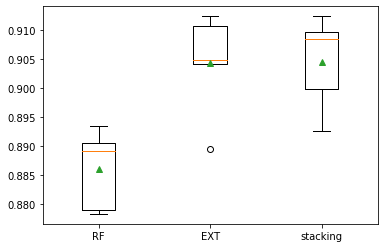

In [37]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()